In [ ]:
pip install deep-translator

In [ ]:
pip install wordcloud

In [ ]:
pip install googletrans

In [ ]:
pip install google_trans_new

In [ ]:
pip install translate

In [23]:
pip install deepl

  Obtaining dependency information for deepl from https://files.pythonhosted.org/packages/19/49/ea8236b939deb56e9b12d95615e3729010a9bd95b2c63d3ac6d4b3f18351/deepl-1.17.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [42]:
from bs4 import BeautifulSoup as bs 
import deep_translator
#import goslate
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [24]:
from concurrent.futures import ThreadPoolExecutor
from deep_translator import GoogleTranslator
import deepl
from googletrans import Translator
#from translate import Translator

In [3]:
from deep_translator import (GoogleTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             DeeplTranslator,
                             single_detection,
                             batch_detection)

In [4]:
orders = pd.read_csv('olist_project/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
products = pd.read_csv('olist_project/olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
order_items = pd.read_csv('olist_project/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
customers = pd.read_csv('olist_project/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
reviews = pd.read_csv('olist_project/olist_order_reviews_dataset.csv')
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
reviews.describe()

In [ ]:
reviews.info()

In [ ]:
orders.head(10)

In [ ]:
orders.info()

In [ ]:
products.info()

In [ ]:
products.head()

In [9]:
# Filter orders by the specified dates
filtered_orders_2016 = orders[(orders['order_purchase_timestamp'] >= '2016-11-11') & (orders['order_purchase_timestamp'] <= '2016-11-25')]
filtered_orders_2017 = orders[(orders['order_purchase_timestamp'] >= '2017-11-10') & (orders['order_purchase_timestamp'] <= '2017-11-24')]
filtered_orders_2018 = orders[(orders['order_purchase_timestamp'] >= '2018-11-09') & (orders['order_purchase_timestamp'] <= '2018-11-23')]

In [ ]:
filtered_orders_2016.info()

In [ ]:
filtered_orders_2016.head()

In [ ]:
filtered_orders_2017.info()

In [ ]:
filtered_orders_2017.head()

In [ ]:
filtered_orders_2018.head()

In [ ]:
filtered_orders_2018.info()

In [10]:
# Merge filtered orders with other DataFrames
merged_2016 = filtered_orders_2016.merge(order_items, on='order_id', how='inner') \
                                 .merge(products, on='product_id', how='inner') \
                                 .merge(customers, on='customer_id', how='inner') \
                                 .merge(reviews, on='order_id', how='left')

merged_2017 = filtered_orders_2017.merge(order_items, on='order_id', how='inner') \
                                 .merge(products, on='product_id', how='inner') \
                                 .merge(customers, on='customer_id', how='inner') \
                                 .merge(reviews, on='order_id', how='left')

# Concatenate the results
final_merged = pd.concat([merged_2016, merged_2017])

In [ ]:
final_merged.head(30)

In [ ]:
final_merged.info()

In [11]:
sent_analysis = final_merged[['product_category_name', 'review_score', 'review_comment_title', 'review_comment_message']]

In [ ]:
sent_analysis.head()

In [ ]:
sent_analysis.info()

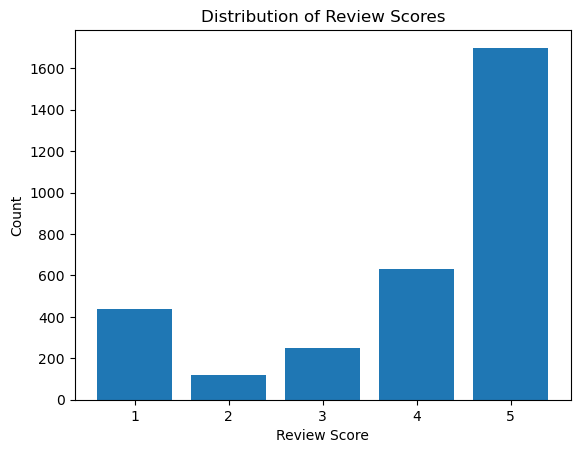

In [12]:
#Distribution of review scores
# Count the occurrences of each score
score_counts = sent_analysis['review_score'].value_counts().sort_index()

# Create a bar chart
plt.bar(score_counts.index, score_counts.values)

# Add labels and title
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')

# Show the plot
plt.show()

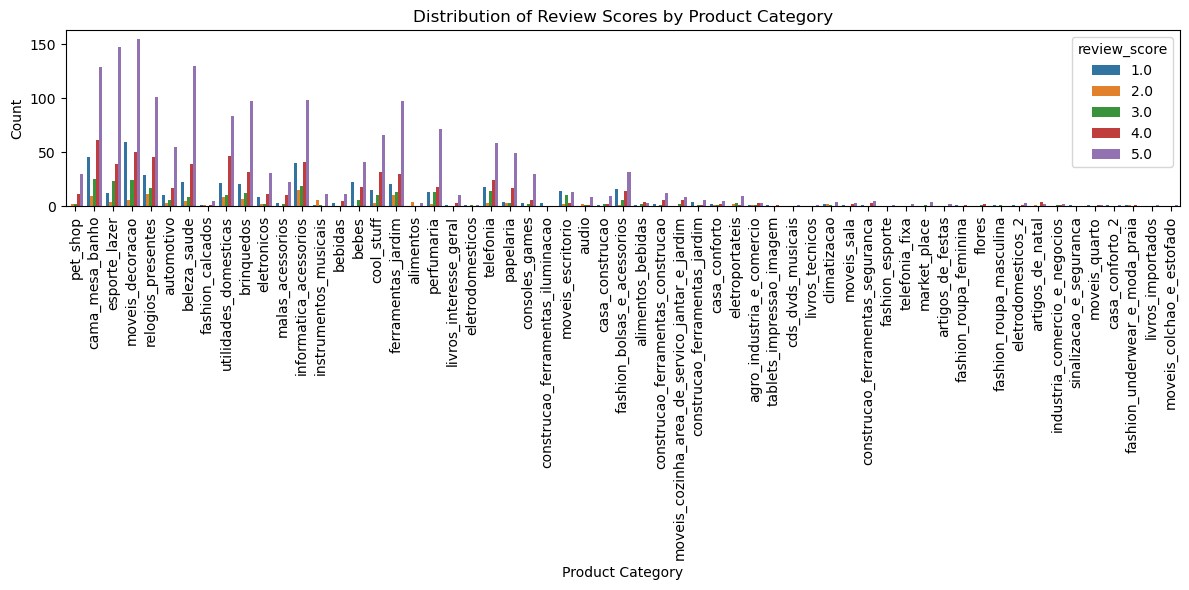

In [13]:
#Distribution of review scores by product category

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Use seaborn's countplot to create the bar chart
sns.countplot(data=sent_analysis, x='product_category_name', hue='review_score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Distribution of Review Scores by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

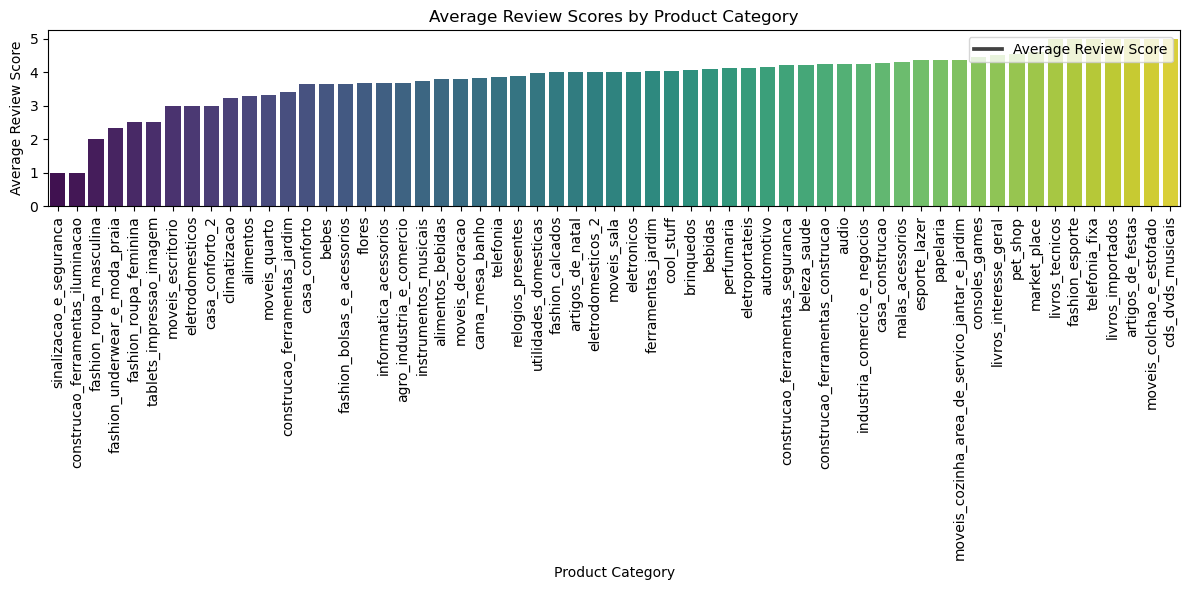

In [14]:
#Average review scores by product category 
# Calculate the average review score for each product category
avg_review_scores = sent_analysis.groupby('product_category_name')['review_score'].mean().sort_values()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Use seaborn's barplot to create the bar chart
sns.barplot(x=avg_review_scores.index, y=avg_review_scores.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Average Review Scores by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')

# Add legend
plt.legend(['Average Review Score'], loc='upper right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [15]:
# Remove rows with missing values in the review_comment_message column
subset_sent_analysis = sent_analysis.dropna(subset=['review_comment_message'])

In [ ]:
subset_sent_analysis.info()

In [ ]:
subset_sent_analysis.head()

In [43]:
# Download NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nhyira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nhyira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nhyira\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nhyira\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
subset_sent_analysis_copy = subset_sent_analysis.copy()


In [17]:
subset_sent_analysis['review_comment_message'].head()

0     O produto foi exatamente o que eu esperava e e...
6                                                   Bom
7                                      não foi entregue
8     Atendeu bastante as minhas expectativas, fácil...
10    Ótimo vendedor recebi corretamente recomendo, ...
Name: review_comment_message, dtype: object

In [25]:
auth_key = "0553e5eb-a91c-4d9f-a2f9-3bfd84d1d304:fx"  # Replace with your key
translator = deepl.Translator(auth_key)

In [28]:
# Function to translate text from Portuguese to English using DeepL
def translate_to_english(text):
    translated_text = translator.translate_text(text, target_lang="EN-US")
    return translated_text

In [31]:
# Apply the translation function to the review_comment_message column
subset_sent_analysis_copy['review_comment_message_en'] = subset_sent_analysis_copy['review_comment_message'].apply(translate_to_english)

In [32]:
subset_sent_analysis_copy.head()

,product_category_name,review_score,review_comment_title,review_comment_message,review_comment_message_en
0,pet_shop,5.0,NaN,O produto foi exatamente o que eu esperava e e...,The product was exactly what I expected and wh...
6,relogios_presentes,5.0,NaN,Bom,Bom
7,relogios_presentes,1.0,NaN,não foi entregue,has not been delivered
8,relogios_presentes,3.0,NaN,"Atendeu bastante as minhas expectativas, fácil...","It lived up to my expectations, easy to use in..."
10,relogios_presentes,5.0,NaN,"Ótimo vendedor recebi corretamente recomendo, ...",Great seller I received it correctly I recomme...


In [38]:
subset_sent_analysis_copy['review_comment_message_en']=subset_sent_analysis_copy['review_comment_message_en'].astype(str)

In [33]:
# Function to clean, tokenize, and convert text to lowercase
def clean_tokenize_lowercase(text):
    # Remove special characters, punctuation, and numbers
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text into words
    tokens = word_tokenize(cleaned_text)
    # Convert tokens to lowercase
    lowercase_tokens = [token.lower() for token in tokens]
    return lowercase_tokens


In [39]:
# Apply the clean_tokenize_lowercase function to the review_comment_message_en column
subset_sent_analysis_copy['review_comment_message_en_cleaned'] = subset_sent_analysis_copy['review_comment_message_en'].apply(clean_tokenize_lowercase)

In [40]:
subset_sent_analysis_copy.head()

,product_category_name,review_score,review_comment_title,review_comment_message,review_comment_message_en,review_comment_message_en_cleaned
0,pet_shop,5.0,NaN,O produto foi exatamente o que eu esperava e e...,The product was exactly what I expected and wh...,"[the, product, was, exactly, what, i, expected..."
6,relogios_presentes,5.0,NaN,Bom,Bom,[bom]
7,relogios_presentes,1.0,NaN,não foi entregue,has not been delivered,"[has, not, been, delivered]"
8,relogios_presentes,3.0,NaN,"Atendeu bastante as minhas expectativas, fácil...","It lived up to my expectations, easy to use in...","[it, lived, up, to, my, expectations, easy, to..."
10,relogios_presentes,5.0,NaN,"Ótimo vendedor recebi corretamente recomendo, ...",Great seller I received it correctly I recomme...,"[great, seller, i, received, it, correctly, i,..."


In [44]:
# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [48]:
def get_sentiment(text):
    
    # Get sentiment scores
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Classify sentiment based on compound score
    if compound_score >= 0.05:
        sentiment = 'positive'
    elif compound_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment, compound_score

In [51]:
# Apply the get_sentiment function to the review_comment_message column
#subset_sent_analysis_copy['compound_score'] = subset_sent_analysis_copy['review_comment_message_en'].apply(get_sentiment)
# Apply the get_sentiment function to the review_comment_message column
subset_sent_analysis_copy['sentiment'], subset_sent_analysis_copy['compound_score'] = zip(*subset_sent_analysis_copy['review_comment_message_en'].apply(get_sentiment))

In [52]:
subset_sent_analysis_copy.head(10)

,product_category_name,review_score,review_comment_title,review_comment_message,review_comment_message_en,review_comment_message_en_cleaned,sentiment,compound_score
0,pet_shop,5.0,NaN,O produto foi exatamente o que eu esperava e e...,The product was exactly what I expected and wh...,"[the, product, was, exactly, what, i, expected...",positive,0.2732
6,relogios_presentes,5.0,NaN,Bom,Bom,[bom],neutral,0.0000
7,relogios_presentes,1.0,NaN,não foi entregue,has not been delivered,"[has, not, been, delivered]",neutral,0.0000
8,relogios_presentes,3.0,NaN,"Atendeu bastante as minhas expectativas, fácil...","It lived up to my expectations, easy to use in...","[it, lived, up, to, my, expectations, easy, to...",positive,0.4404
10,relogios_presentes,5.0,NaN,"Ótimo vendedor recebi corretamente recomendo, ...",Great seller I received it correctly I recomme...,"[great, seller, i, received, it, correctly, i,...",positive,0.9217
11,relogios_presentes,1.0,NaN,Estou extremamente insastifita até agora meu p...,I'm extremely dissatisfied and so far my produ...,"[im, extremely, dissatisfied, and, so, far, my...",negative,-0.4391
18,automotivo,4.0,NaN,Ótimo produto,Great product,"[great, product]",positive,0.6249
25,beleza_saude,1.0,NaN,Não recebi meu produto e só atualizaram o rast...,I didn't receive my product and they only upda...,"[i, didnt, receive, my, product, and, they, on...",negative,-0.4257
26,fashion_calcados,5.0,NaN,Gostei doproduto comprado obrigado.,"I liked the product I bought, thank you.","[i, liked, the, product, i, bought, thank, you]",positive,0.6486
30,utilidades_domesticas,1.0,NaN,Era a panela de pipoca vermelha não sinza,"It was the red popcorn pot, not sinza","[it, was, the, red, popcorn, pot, not, sinza]",neutral,0.0000


In [55]:
# Calculate average review score for each product category
average_scores = subset_sent_analysis_copy.groupby('product_category_name')['review_score'].mean()

# Merge average_scores with subset_sent_analysis based on product_category_name
subset_sent_analysis_copy = pd.merge(subset_sent_analysis_copy, average_scores, on='product_category_name', suffixes=('', '_avg'))

# Rename the new column
subset_sent_analysis_copy.rename(columns={'review_score_avg': 'average_review_score'}, inplace=True)


In [57]:
subset_sent_analysis_copy.head(50)

,product_category_name,review_score,review_comment_title,review_comment_message,review_comment_message_en,review_comment_message_en_cleaned,sentiment,compound_score,average_scores,average_review_score
0,pet_shop,5.0,NaN,O produto foi exatamente o que eu esperava e e...,The product was exactly what I expected and wh...,"[the, product, was, exactly, what, i, expected...",positive,0.2732,NaN,4.294118
1,pet_shop,2.0,NaN,"Foi aberto chamado no site ontem dia 22/11, po...",A call was made to the website yesterday (22/1...,"[a, call, was, made, to, the, website, yesterd...",neutral,0.0000,NaN,4.294118
2,pet_shop,5.0,NaN,Estou super satisfeita com a minha compra!\r\n,I'm super happy with my purchase!\r\n,"[im, super, happy, with, my, purchase]",positive,0.8356,NaN,4.294118
3,pet_shop,5.0,NaN,Entrega feita antes do prazo,Delivery ahead of schedule,"[delivery, ahead, of, schedule]",neutral,0.0000,NaN,4.294118
4,pet_shop,5.0,NaN,Gostei do produto e da eficiência na entrega.,I liked the product and the efficient delivery.,"[i, liked, the, product, and, the, efficient, ...",positive,0.6808,NaN,4.294118
5,pet_shop,5.0,NaN,Gostei do produto e da eficiência na entrega.,I liked the product and the efficient delivery.,"[i, liked, the, product, and, the, efficient, ...",positive,0.6808,NaN,4.294118
6,pet_shop,2.0,NaN,O produto para carro pequeno,The product for small cars,"[the, product, for, small, cars]",neutral,0.0000,NaN,4.294118
7,pet_shop,5.0,NaN,muito bom,very good,"[very, good]",positive,0.4927,NaN,4.294118
8,pet_shop,4.0,NaN,"Pontualidade, e recomendo e recomendo está loja","Punctuality, and I recommend and recommend thi...","[punctuality, and, i, recommend, and, recommen...",positive,0.6124,NaN,4.294118
9,pet_shop,3.0,NaN,Demora entrega,Delayed delivery,"[delayed, delivery]",negative,-0.2263,NaN,4.294118


In [58]:
# Calculate average compound score for each product category
average_compound_scores = subset_sent_analysis_copy.groupby('product_category_name')['compound_score'].mean()

# Merge average_compound_scores with subset_sent_analysis based on product_category_name
subset_sent_analysis_copy = pd.merge(subset_sent_analysis_copy, average_compound_scores, on='product_category_name', suffixes=('', '_avg_compound'))

# Rename the new column
subset_sent_analysis_copy.rename(columns={'compound_score_avg': 'average_compound_score'}, inplace=True)


In [59]:
subset_sent_analysis_copy.head(50)

,product_category_name,review_score,review_comment_title,review_comment_message,review_comment_message_en,review_comment_message_en_cleaned,sentiment,compound_score,average_scores,average_review_score,compound_score_avg_compound
0,pet_shop,5.0,NaN,O produto foi exatamente o que eu esperava e e...,The product was exactly what I expected and wh...,"[the, product, was, exactly, what, i, expected...",positive,0.2732,NaN,4.294118,0.203800
1,pet_shop,2.0,NaN,"Foi aberto chamado no site ontem dia 22/11, po...",A call was made to the website yesterday (22/1...,"[a, call, was, made, to, the, website, yesterd...",neutral,0.0000,NaN,4.294118,0.203800
2,pet_shop,5.0,NaN,Estou super satisfeita com a minha compra!\r\n,I'm super happy with my purchase!\r\n,"[im, super, happy, with, my, purchase]",positive,0.8356,NaN,4.294118,0.203800
3,pet_shop,5.0,NaN,Entrega feita antes do prazo,Delivery ahead of schedule,"[delivery, ahead, of, schedule]",neutral,0.0000,NaN,4.294118,0.203800
4,pet_shop,5.0,NaN,Gostei do produto e da eficiência na entrega.,I liked the product and the efficient delivery.,"[i, liked, the, product, and, the, efficient, ...",positive,0.6808,NaN,4.294118,0.203800
5,pet_shop,5.0,NaN,Gostei do produto e da eficiência na entrega.,I liked the product and the efficient delivery.,"[i, liked, the, product, and, the, efficient, ...",positive,0.6808,NaN,4.294118,0.203800
6,pet_shop,2.0,NaN,O produto para carro pequeno,The product for small cars,"[the, product, for, small, cars]",neutral,0.0000,NaN,4.294118,0.203800
7,pet_shop,5.0,NaN,muito bom,very good,"[very, good]",positive,0.4927,NaN,4.294118,0.203800
8,pet_shop,4.0,NaN,"Pontualidade, e recomendo e recomendo está loja","Punctuality, and I recommend and recommend thi...","[punctuality, and, i, recommend, and, recommen...",positive,0.6124,NaN,4.294118,0.203800
9,pet_shop,3.0,NaN,Demora entrega,Delayed delivery,"[delayed, delivery]",negative,-0.2263,NaN,4.294118,0.203800


In [87]:
# Function to classify sentiment based on compound score
def classify_avg_sentiment(compound_score):
    if compound_score >= 0.10:
        return 'positive'
    elif compound_score <= 0:
        return 'negative'
    else:
        return 'neutral'



In [88]:
# Apply the sentiment classification function to the average compound scores
subset_sent_analysis_copy['average_sentiment'] = subset_sent_analysis_copy['compound_score_avg_compound'].apply(classify_avg_sentiment)


In [89]:
subset_sent_analysis_copy.head(50)

,product_category_name,review_score,review_comment_title,review_comment_message,review_comment_message_en,review_comment_message_en_cleaned,sentiment,compound_score,average_scores,average_review_score,compound_score_avg_compound,average_sentiment
0,pet_shop,5.0,NaN,O produto foi exatamente o que eu esperava e e...,The product was exactly what I expected and wh...,"[the, product, was, exactly, what, i, expected...",positive,0.2732,NaN,4.294118,0.203800,positive
1,pet_shop,2.0,NaN,"Foi aberto chamado no site ontem dia 22/11, po...",A call was made to the website yesterday (22/1...,"[a, call, was, made, to, the, website, yesterd...",neutral,0.0000,NaN,4.294118,0.203800,positive
2,pet_shop,5.0,NaN,Estou super satisfeita com a minha compra!\r\n,I'm super happy with my purchase!\r\n,"[im, super, happy, with, my, purchase]",positive,0.8356,NaN,4.294118,0.203800,positive
3,pet_shop,5.0,NaN,Entrega feita antes do prazo,Delivery ahead of schedule,"[delivery, ahead, of, schedule]",neutral,0.0000,NaN,4.294118,0.203800,positive
4,pet_shop,5.0,NaN,Gostei do produto e da eficiência na entrega.,I liked the product and the efficient delivery.,"[i, liked, the, product, and, the, efficient, ...",positive,0.6808,NaN,4.294118,0.203800,positive
5,pet_shop,5.0,NaN,Gostei do produto e da eficiência na entrega.,I liked the product and the efficient delivery.,"[i, liked, the, product, and, the, efficient, ...",positive,0.6808,NaN,4.294118,0.203800,positive
6,pet_shop,2.0,NaN,O produto para carro pequeno,The product for small cars,"[the, product, for, small, cars]",neutral,0.0000,NaN,4.294118,0.203800,positive
7,pet_shop,5.0,NaN,muito bom,very good,"[very, good]",positive,0.4927,NaN,4.294118,0.203800,positive
8,pet_shop,4.0,NaN,"Pontualidade, e recomendo e recomendo está loja","Punctuality, and I recommend and recommend thi...","[punctuality, and, i, recommend, and, recommen...",positive,0.6124,NaN,4.294118,0.203800,positive
9,pet_shop,3.0,NaN,Demora entrega,Delayed delivery,"[delayed, delivery]",negative,-0.2263,NaN,4.294118,0.203800,positive


In [93]:
# Filter the DataFrame for rows with negative average sentiment
negative_sentiment_df = subset_sent_analysis_copy[subset_sent_analysis_copy['average_sentiment'] == 'negative']

# Display the product category names with negative average sentiment
negative_product_categories = negative_sentiment_df['product_category_name'].unique()
print("Product categories with negative average sentiment:")
print(negative_product_categories)


Product categories with negative average sentiment:
['alimentos' 'moveis_escritorio' 'construcao_ferramentas_construcao'
 'eletrodomesticos' 'construcao_ferramentas_iluminacao'
 'sinalizacao_e_seguranca' 'market_place' 'fashion_roupa_masculina'
 'fashion_underwear_e_moda_praia']
